In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Data

Dataset used: Wine dataset with 13 features and 3 classes

Goal: Wine type based on origin classification based on chemical content
*Aeberhard,Stefan and Forina,M.. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.

In [3]:
from ucimlrepo import fetch_ucirepo 
data = fetch_ucirepo(id=109) 
  
X = data.data.features 
Y = data.data.targets 

print(data.keys())
#print(data.metadata) 
print(data.variables) 

dict_keys(['data', 'metadata', 'variables'])
                            name     role         type demographic  \
0                          class   Target  Categorical        None   
1                        Alcohol  Feature   Continuous        None   
2                      Malicacid  Feature   Continuous        None   
3                            Ash  Feature   Continuous        None   
4              Alcalinity_of_ash  Feature   Continuous        None   
5                      Magnesium  Feature      Integer        None   
6                  Total_phenols  Feature   Continuous        None   
7                     Flavanoids  Feature   Continuous        None   
8           Nonflavanoid_phenols  Feature   Continuous        None   
9                Proanthocyanins  Feature   Continuous        None   
10               Color_intensity  Feature   Continuous        None   
11                           Hue  Feature   Continuous        None   
12  0D280_0D315_of_diluted_wines  Feature   C

In [4]:
X[:2]

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [5]:
Y['class'].unique()

array([1, 2, 3])

In [6]:
xstats = X.describe()
xstats

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
X_norm = X.copy()
for col in X.keys():
    X_norm[col] = (X_norm[col] - xstats.min()[col])/(xstats.max()[col]-xstats.min()[col])
X_norm[:3]

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,0.075728,0.005472,0.012129,0.070196,0.688488,0.012257,0.015310,0.000874,0.010586,0.024672,0.004564,0.018106,0.590546
1,0.069915,0.005867,0.010497,0.045004,0.523570,0.011412,0.013622,0.000762,0.004899,0.017542,0.004621,0.015173,0.580559
2,0.069690,0.009139,0.013480,0.087372,0.529678,0.012257,0.016323,0.000987,0.013514,0.024898,0.004508,0.013876,0.670439


Inputs and outputs

In [8]:
X_norm.corr()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [9]:
features = X_norm.keys().tolist()
#features.remove('Flavanoids'), features.remove('Total_phenols') #removing correlated features
print(len(features))
x_inp = np.hstack((np.ones((len(X),1)),np.array(X_norm[features])))
y = np.array(Y)
x_inp.shape, y.shape

13


((178, 14), (178, 1))

In [10]:
y = np.zeros((Y.shape[0],len(Y['class'].unique())))
one_hot = {1:[1,0,0],2:[0,1,0],3:[0,0,1]}
for i in range(len(y)):
    y[i,:] = one_hot[Y['class'][i]]

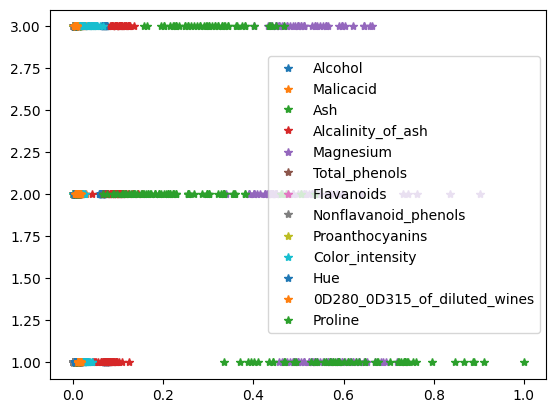

In [11]:
plt.plot(x_inp[:,1::],Y,'*', label=features[:])
plt.legend()

# Multiclass logistic regression

In [12]:
from sklearn.metrics import log_loss

def bce(true,pred):
    return -1*np.mean(true*np.log(pred+1e-10) + (1-true)*np.log(1-pred+1e-10))

def cce(true,pred):
    return -1*np.sum( true*np.log(pred+1e-10))/true.shape[0]

def logistic(z):
    return 1/(1+np.exp(-z))

def softmax(z):
    p = np.exp(z)
    return p/np.sum(p,axis=1).reshape(-1,1)

def acc(true,pred):
    '''Accuracy for multiclass classification'''
    return 100*np.sum(np.argmax(true,axis=1)==(np.argmax(pred,axis=1)))/true.shape[0]

def acc_bin(true,pred):
    '''Accuracy for binary classification'''
    return 100*np.mean(true==pred)

class metrics: 
    '''Evaluation metrics for binary classification'''
    def __init__(self, true=None,pred=None):
        self.true = true
        self.pred = pred
    
    def compute(self):
        self.tp = np.sum((self.true==1)&(self.pred==1))
        self.fp = np.sum((self.true==0)&(self.pred==1))
        self.fn = np.sum((self.true==1)&(self.pred==0))
        
        self.acc = 100*np.sum(self.true==(self.pred>0.5))/self.true.shape[0]
    
        self.precision = self.tp/(self.tp+self.fp+1e-10)
    
        self.recall = self.tp/(self.tp+self.fn+1e-10)

        self.f1 = 2*self.precision*self.recall/(self.precision+self.recall+1e-10)
    
    def show(self):
        print('Accuracy: ',self.acc, ' %')
        print('Precision: ',self.precision)
        print('Recall: ',self.recall)
        print('F1 score: ',self.f1)
        

Using Adam optimizer

In [13]:
theta = np.zeros((x_inp.shape[1],y.shape[1]))

#Adam optimizer
iters, lr = 100, 0.4
beta1, beta2, eps = 0.05, 0.95 , 0.000000001
vt, mt, = 0, 0
loss = np.zeros((iters,y.shape[1]))
for it in range(iters):
    pred = softmax(np.dot(x_inp,theta))
    loss[it] = cce(y,pred)
    
    grad = -1*np.dot(x_inp.T, y-pred) 
    
    mt = beta1*mt + (1-beta1)*grad
    vt = beta2*vt + (1-beta2)*(grad**2)
    theta = theta - lr*mt/(np.sqrt(vt+eps))
    
    print('Iteration: ',it,' CCE loss: ',np.mean(loss[it]), 'Accuracy: ',np.round(acc(y,pred),2), ' %')
    #break

Iteration:  0  CCE loss:  1.0986122883681098 Accuracy:  33.15  %
Iteration:  1  CCE loss:  2.1424691822562574 Accuracy:  39.89  %
Iteration:  2  CCE loss:  2.366115291896995 Accuracy:  33.15  %
Iteration:  3  CCE loss:  1.3067563858616367 Accuracy:  26.97  %
Iteration:  4  CCE loss:  1.02799369307198 Accuracy:  67.98  %
Iteration:  5  CCE loss:  0.7441806165062931 Accuracy:  67.98  %
Iteration:  6  CCE loss:  0.7142306983668106 Accuracy:  82.02  %
Iteration:  7  CCE loss:  0.6914609507060244 Accuracy:  70.22  %
Iteration:  8  CCE loss:  0.6738251163108232 Accuracy:  79.21  %
Iteration:  9  CCE loss:  0.6591027443883848 Accuracy:  74.72  %
Iteration:  10  CCE loss:  0.6454812957041243 Accuracy:  79.21  %
Iteration:  11  CCE loss:  0.6326619974796552 Accuracy:  78.09  %
Iteration:  12  CCE loss:  0.6204976546489724 Accuracy:  80.34  %
Iteration:  13  CCE loss:  0.6089103112602572 Accuracy:  80.34  %
Iteration:  14  CCE loss:  0.5978454208909066 Accuracy:  80.9  %
Iteration:  15  CCE loss

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_recall_fscore_support as sc

pred = softmax(np.dot(x_inp,theta))

yy = np.argmax(y,axis=1)
y_pred = np.argmax(pred,axis=1)
scores = sc(yy,y_pred,average='weighted')
print('####Logistic Regression with Adam optimizer from scratch######### \nAccuracy',acc(y,pred))
print('Precision: ' ,scores[0],'\nRecall: ',scores[1],'\nF1 score: ',scores[2])

sk_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(x_inp, Y)
sk_predict = sk_model.predict(x_inp)
scores = sc(yy,sk_predict, average='weighted')
print('\n####Scikit################\nAccuracy:',acc_bin(yy,sk_predict))
print('Precision: ' ,scores[0],'\nRecall: ',scores[1],'\nF1 score: ',scores[2])


####Logistic Regression with Adam optimizer from scratch######### 
Accuracy 94.38202247191012
Precision:  0.9481822601555748 
Recall:  0.9438202247191011 
F1 score:  0.9433582311492625

####Scikit################
Accuracy: 26.96629213483146
Precision:  0.13374920959190623 
Recall:  0.2696629213483146 
F1 score:  0.17405888624620683


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
